In [1]:
import tensorflow as tf


In [2]:
print(tf.__version__)

2.0.0


In [3]:
a = tf.constant("Hello world!")
print(a)

tf.Tensor(b'Hello world!', shape=(), dtype=string)


In [33]:
def f(x): return tf.multiply(x, 1.)
scalar = tf.constant(1.0)
vector = tf.constant([1.0, 1.0])
matrix = tf.constant([[3.0]])
print(f(scalar))
print(f(vector))
print(f(matrix))

tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor([1. 1.], shape=(2,), dtype=float32)
tf.Tensor([[3.]], shape=(1, 1), dtype=float32)


In [5]:
n_input = 4
n_output = 3
n_hidden = 10
#hyperparameter
learning_rate = 0.01
training_epochs = 2000
display_steps = 200

In [11]:

# Getting data
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
iris_data = load_iris() # load the iris dataset
x = iris_data.data
y_ = iris_data.target.reshape(-1, 1) # Convert data to a single column
# One Hot encode the class labels
encoder = OneHotEncoder(sparse=False,categories='auto')
y = encoder.fit_transform(y_)
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.20)

In [12]:
# Build the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(n_hidden,input_shape=(n_input,), activation='relu',name='fc1'))
model.add(tf.keras.layers.Dense(n_output,activation='softmax', name='output'))
# Adam optimizer with learning rate of 0.001
optimizer = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer,loss='categorical_crossentropy', metrics=['accuracy'])
print('Neural Network Model Summary: ')
print(model.summary())


Neural Network Model Summary: 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 10)                50        
_________________________________________________________________
output (Dense)               (None, 3)                 33        
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
model.fit(train_x, train_y, verbose=2, batch_size=5,
epochs=200)
# Test on unseen data
results = model.evaluate(test_x, test_y)

Train on 120 samples
Epoch 1/200
120/120 - 1s - loss: 3.9549 - accuracy: 0.3250
Epoch 2/200
120/120 - 0s - loss: 3.0407 - accuracy: 0.3250
Epoch 3/200
120/120 - 0s - loss: 2.2592 - accuracy: 0.3250
Epoch 4/200
120/120 - 0s - loss: 1.6966 - accuracy: 0.3250
Epoch 5/200
120/120 - 0s - loss: 1.3123 - accuracy: 0.3750
Epoch 6/200
120/120 - 0s - loss: 1.0670 - accuracy: 0.6667
Epoch 7/200
120/120 - 0s - loss: 0.9176 - accuracy: 0.6750
Epoch 8/200
120/120 - 0s - loss: 0.8358 - accuracy: 0.6750
Epoch 9/200
120/120 - 0s - loss: 0.7968 - accuracy: 0.6917
Epoch 10/200
120/120 - 0s - loss: 0.7670 - accuracy: 0.7083
Epoch 11/200
120/120 - 0s - loss: 0.7472 - accuracy: 0.7167
Epoch 12/200
120/120 - 0s - loss: 0.7280 - accuracy: 0.7333
Epoch 13/200
120/120 - 0s - loss: 0.7111 - accuracy: 0.7917
Epoch 14/200
120/120 - 0s - loss: 0.6924 - accuracy: 0.8000
Epoch 15/200
120/120 - 0s - loss: 0.6743 - accuracy: 0.7917
Epoch 16/200
120/120 - 0s - loss: 0.6594 - accuracy: 0.7417
Epoch 17/200
120/120 - 0s - 

Epoch 137/200
120/120 - 0s - loss: 0.1014 - accuracy: 0.9833
Epoch 138/200
120/120 - 0s - loss: 0.1037 - accuracy: 0.9667
Epoch 139/200
120/120 - 0s - loss: 0.0992 - accuracy: 0.9750
Epoch 140/200
120/120 - 0s - loss: 0.1038 - accuracy: 0.9833
Epoch 141/200
120/120 - 0s - loss: 0.0969 - accuracy: 0.9833
Epoch 142/200
120/120 - 0s - loss: 0.0983 - accuracy: 0.9750
Epoch 143/200
120/120 - 0s - loss: 0.1009 - accuracy: 0.9750
Epoch 144/200
120/120 - 0s - loss: 0.0985 - accuracy: 0.9750
Epoch 145/200
120/120 - 0s - loss: 0.0945 - accuracy: 0.9917
Epoch 146/200
120/120 - 0s - loss: 0.0956 - accuracy: 0.9750
Epoch 147/200
120/120 - 0s - loss: 0.0953 - accuracy: 0.9750
Epoch 148/200
120/120 - 0s - loss: 0.0944 - accuracy: 0.9667
Epoch 149/200
120/120 - 0s - loss: 0.0923 - accuracy: 0.9833
Epoch 150/200
120/120 - 0s - loss: 0.0908 - accuracy: 0.9833
Epoch 151/200
120/120 - 0s - loss: 0.0938 - accuracy: 0.9750
Epoch 152/200
120/120 - 0s - loss: 0.0924 - accuracy: 0.9833
Epoch 153/200
120/120 - 

In [14]:
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

Final test set loss: 0.129575
Final test set accuracy: 0.966667


In [15]:
!pip install tensorflow-datasets

  Created wheel for promise: filename=promise-2.2.1-cp37-none-any.whl size=21295 sha256=32b17e4bbf19b6bb3adfb9e331c3f8af74e6ae0e387085268b8c54ec74e705e9
  Stored in directory: C:\Users\Sujoy.Mukherjee\AppData\Local\pip\Cache\wheels\92\84\9f\75e2235effae0e1c5a5c0626a503e532bbffcb7e79e672b606
  Created wheel for googleapis-common-protos: filename=googleapis_common_protos-1.6.0-cp37-none-any.whl size=77585 sha256=b5fd443f01ffa29eac371c93c4a51c6402593ee5bba11a449ebb175eab2aa65e
  Stored in directory: C:\Users\Sujoy.Mukherjee\AppData\Local\pip\Cache\wheels\9e\3d\a2\1bec8bb7db80ab3216dbc33092bb7ccd0debfb8ba42b5668d5
Successfully built promise googleapis-common-protos


In [16]:
import tensorflow_datasets as tfds

In [17]:
tfds.list_builders()

['abstract_reasoning',
 'aflw2k3d',
 'amazon_us_reviews',
 'bair_robot_pushing_small',
 'bigearthnet',
 'binarized_mnist',
 'binary_alpha_digits',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_corrupted',
 'clevr',
 'cnn_dailymail',
 'coco',
 'coco2014',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'diabetic_retinopathy_detection',
 'downsampled_imagenet',
 'dsprites',
 'dtd',
 'dummy_dataset_shared_generator',
 'dummy_mnist',
 'emnist',
 'eurosat',
 'fashion_mnist',
 'flores',
 'food101',
 'gap',
 'glue',
 'groove',
 'higgs',
 'horses_or_humans',
 'image_label_folder',
 'imagenet2012',
 'imagenet2012_corrupted',
 'imdb_reviews',
 'iris',
 'kitti',
 'kmnist',
 'lfw',
 'lm1b',
 'lsun',
 'mnist',
 'mnist_corrupted',
 'moving_mnist',
 'multi_nli',
 'nsynth',
 'omniglot',

In [18]:
iris = tfds.load(name="iris", split=None)

C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset iris downloaded and prepared to C:\Users\Sujoy.Mukherjee\tensorflow_datasets\iris\1.0.0. Subsequent calls will reuse this data.


In [19]:
data, info = tfds.load(name='fashion_mnist',
as_supervised=True, split=None, with_info=True)

Dataset fashion_mnist downloaded and prepared to C:\Users\Sujoy.Mukherjee\tensorflow_datasets\fashion_mnist\1.0.0. Subsequent calls will reuse this data.


In [20]:
print(info)

tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=1.0.0,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    urls=['https://github.com/zalandoresearch/fashion-mnist'],
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
                   Kashif Rasul and
                   Roland Vollgraf},
      title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
                   Algorithms},
      journal   = {CoRR},
      volume  

In [21]:
train, test = data['train'], data['test']

In [26]:
BUFFER_SIZE = 10 # Use a much larger value for real code.
BATCH_SIZE = 64
NUM_EPOCHS = 5
def normalize(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255
    return image, label

train_data = train.map(normalize).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
test_data = test.map(normalize).batch(BATCH_SIZE)
STEPS_PER_EPOCH = 5
train_data = train_data.take(STEPS_PER_EPOCH)
test_data = test_data.take(STEPS_PER_EPOCH)

In [27]:
image_batch, label_batch = next(iter(train_data))

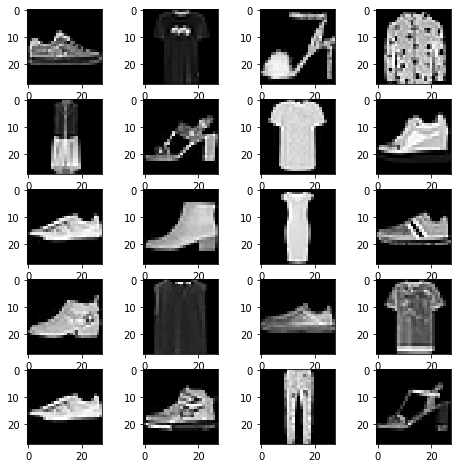

In [29]:
import numpy as np
import matplotlib.pyplot as plt
idx = np.random.randint(0, BATCH_SIZE, size =30 )
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(image_batch[idx[i],:,:,0], cmap='gray')
plt.show()

In [31]:
model = tf.keras.Sequential([
tf.keras.layers.Conv2D(32, 3, activation='relu',
kernel_regularizer=tf.keras.regularizers.l2(0.02),
input_shape=(28, 28, 1)),
tf.keras.layers.MaxPooling2D(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dropout(0.1),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dense(10, activation='softmax')])

In [32]:
# Model is the full model w/o custom layers
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
model.fit(train_data, epochs=NUM_EPOCHS)
loss, acc = model.evaluate(test_data)
print("Loss {}, Accuracy {}".format(loss, acc))

Epoch 1/5
5/5 [==============================]ss: 2.8062 - accuracy: 0.156 - 1s 345ms/step - loss: 2.3311 - accuracy: 0.257 - 1s 241ms/step - loss: 2.0238 - accuracy: 0.343 - 1s 188ms/step - loss: 1.8105 - accuracy: 0.390 - 1s 158ms/step - loss: 1.7124 - accuracy: 0.409 - 1s 217ms/step - loss: 1.7124 - accuracy: 0.4094
Epoch 2/5
5/5 [==============================] - ETA: 0s - loss: 0.8710 - accuracy: 0.75 - ETA: 0s - loss: 0.8699 - accuracy: 0.74 - 0s 53ms/step - loss: 0.8283 - accuracy: 0.7594
Epoch 3/5
5/5 [==============================] - ETA: 0s - loss: 0.7199 - accuracy: 0.78 - ETA: 0s - loss: 0.6485 - accuracy: 0.81 - 0s 55ms/step - loss: 0.6264 - accuracy: 0.8375
Epoch 4/5
5/5 [==============================] - ETA: 0s - loss: 0.6194 - accuracy: 0.81 - ETA: 0s - loss: 0.5088 - accuracy: 0.88 - 0s 54ms/step - loss: 0.5313 - accuracy: 0.8656
Epoch 5/5
5/5 [==============================]ss: 1.4924 - accuracy: 0.734 - 0s 63ms/step - loss: 1.4703 - accuracy: 0.710 - 0s 47ms/step -

In [34]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
